In [2]:
%pylab inline
#% config InlineBackend.figure_format = 'svg'
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Populating the interactive namespace from numpy and matplotlib


In [1]:
from __future__ import print_function, division
# if needed: pip install requests or conda install requests
import requests

In [6]:

url = 'https://www.basketball-reference.com/leagues/NBA_2018_advanced.html'


tables = pd.read_html(url)


tables[0]


Rk                 Player  Pos  Age   Tm   G    MP   PER   TS%  3PAr  \
0      1           Álex Abrines   SG   24  OKC  75  1134   9.0  .567  .759   
1      2             Quincy Acy   PF   27  BRK  70  1359   8.2  .525  .800   
2      3           Steven Adams    C   24  OKC  76  2487  20.6  .630  .003   
3      4            Bam Adebayo    C   20  MIA  69  1368  15.7  .570  .021   
4      5          Arron Afflalo   SG   32  ORL  53   682   5.8  .516  .432   
5      6           Cole Aldrich    C   29  MIN  21    49   6.0  .340  .000   
6      7      LaMarcus Aldridge    C   32  SAS  75  2509  25.0  .570  .068   
7      8          Jarrett Allen    C   19  BRK  72  1441  17.5  .636  .038   
8      9           Kadeem Allen   PG   25  BOS  18   107   2.6  .366  .500   
9     10             Tony Allen   SF   36  NOP  22   273   8.7  .514  .132   
10    11        Al-Farouq Aminu   PF   27  POR  69  2072  12.0  .522  .582   
11    12        Justin Anderson   SF   24  PHI  38   519  13.0  .540  .510   
12    13          Kyle Anderson   SF   24  SAS  74  1978  15.9  .582  .130   
13    14          Ryan Anderson   PF   29  HOU  66  1725  12.6  .592  .706   
14    15           Ike Anigbogu    C   19  IND  11    30  21.6  .558  .000   
15    16  Giannis Antetokounmpo   PF   23  MIL  75  2756  27.3  .598  .100   
16    17        Carmelo Anthony   PF   33  OKC  78  2501  12.7  .503  .406   
17    18             OG Anunoby   SF   20  TOR  74  1481  10.0  .587  .569   
18    19       Ryan Arcidiacono   PG   23  CHI  24   304   7.3  .550  .756   
19    20           Trevor Ariza   SF   32  HOU  67  2269  11.8  .567  .710   
20    Rk                 Player  Pos  Age   Tm   G    MP   PER   TS%  3PAr   
21    21         Darrell Arthur   PF   29  DEN  19   141   8.4  .559  .489   
22    22            Jamel Artis   SG   25  ORL  15   279   6.9  .457  .367   
23    23              Ömer Aşık    C   31  TOT  18   182   3.1  .397  .000   
24    23              Ömer Aşık    C   31  NOP  14   121   4.5  .423  .000   
25    23              Ömer Aşık    C   31  CHI   4    61   0.2  .311  .000   
26    24          D.J. Augustin   PG   30  ORL  75  1760  15.4  .615  .504   
27    25           Luke Babbitt   SF   28  TOT  50   715   9.8  .576  .726   
28    25           Luke Babbitt   SF   28  ATL  37   570  12.0  .636  .661   
29    25           Luke Babbitt   SF   28  MIA  13   145   1.3  .351  .957   
..   ...                    ...  ...  ...  ...  ..   ...   ...   ...   ...   
660  518          C.J. Williams   SG   27  LAC  38   707   9.5  .512  .396   
661  519       Derrick Williams   PF   26  LAL   2     9  -3.2  .250  .500   
662  520           Lou Williams   SG   31  LAC  79  2589  20.2  .574  .387   
663   Rk                 Player  Pos  Age   Tm   G    MP   PER   TS%  3PAr   
664  521        Marvin Williams   PF   31  CHO  78  2006  13.9  .603  .542   
665  522          Matt Williams   SG   24  MIA   3    11  -0.7  .417  .833   
666  523          Troy Williams   SF   23  TOT  21   307  15.1  .544  .349   
667  523          Troy Williams   SF   23  HOU   4    17  -2.4  .242  .556   
668  523          Troy Williams   SF   23  NYK  17   290  16.2  .572  .330   
669  524            D.J. Wilson   PF   21  MIL  22    71  10.3  .622  .313   
670  525           Jamil Wilson   SF   27  LAC  15   274  11.4  .634  .778   
671  526        Justise Winslow   PF   21  MIA  68  1680  11.5  .496  .264   
672  527            Jeff Withey    C   27  DAL   9    39   8.3  .444  .625   
673  528           Nate Wolters   PG   26  UTA   5    19  -2.9  .167  .000   
674  529         Brandan Wright   PF   30  TOT  28   381  19.0  .596  .000   
675  529         Brandan Wright   PF   30  MEM  27   366  19.3  .595  .000   
676  529         Brandan Wright   PF   30  HOU   1    15  11.3  .667  .000   
677  530           Delon Wright   PG   25  TOR  69  1433  16.5  .574  .354   
678  531     Guerschon Yabusele   PF   22  BOS  33   235  12.3  .559  .607   
679  532            James Yo

In [8]:
url2='https://hoopshype.com/salaries/players/'
tables2=pd.read_html(url2)
tables2[0]

Unnamed: 0                  Player      2019/20      2020/21  \
0           1.0           Stephen Curry  $40,231,758  $43,006,362   
1           2.0       Russell Westbrook  $38,506,482  $41,358,814   
2           2.0              Chris Paul  $38,506,482  $41,358,814   
3           4.0            James Harden  $38,199,000  $41,254,920   
4           4.0               John Wall  $38,199,000  $41,254,920   
5           6.0            LeBron James  $37,436,858  $39,219,566   
6           7.0            Kevin Durant  $37,199,000  $39,058,950   
7           8.0           Blake Griffin  $34,449,964  $36,810,996   
8           9.0              Kyle Lowry  $33,296,296           $0   
9          10.0             Paul George  $33,005,556  $35,450,412   
10         11.0           Klay Thompson  $32,742,000  $35,361,360   
11         11.0            Kemba Walker  $32,742,000  $34,379,100   
12         11.0           Kawhi Leonard  $32,742,000  $34,379,100   
13         11.0            Jimmy Butler  $32,742,000  $34,379,100   
14         11.0           Tobias Harris  $32,742,000  $34,358,850   
15         16.0          Gordon Hayward  $32,700,690  $34,187,085   
16         17.0             Mike Conley  $32,511,623  $34,502,130   
17         18.0            Kyrie Irving  $31,742,000  $33,329,100   
18         19.0         Khris Middleton  $30,603,448  $33,051,724   
19         20.0            Paul Millsap  $30,000,000           $0   
20         21.0          Damian Lillard  $29,802,321  $31,626,953   
21         22.0              Kevin Love  $28,942,830  $31,258,256   
22         23.0              Al Horford  $28,000,000  $27,500,000   
23         23.0          Nikola Vucevic  $28,000,000  $26,000,000   
24         25.0           DeMar DeRozan  $27,739,975  $27,739,975   
25         26.0             CJ McCollum  $27,556,959  $29,354,152   
26         27.0            Nikola Jokic  $27,504,630  $29,542,010   
27         27.0          Andrew Wiggins  $27,504,630  $29,542,010   
28         27.0             Joel Embiid  $27,504,630  $29,542,010   
29         30.0      Kristaps Porzingis  $27,285,000  $29,467,800   
..          ...                     ...          ...          ...   
566       555.0              Tyler Cook      $79,568           $0   
567       555.0             Jordan Bone      $79,568           $0   
568       555.0              Louis King      $79,568           $0   
569       555.0               Ky Bowman      $79,568           $0   
570       555.0              Damion Lee      $79,568           $0   
571       555.0          Shamorie Ponds      $79,568           $0   
572       555.0             Brian Bowen      $79,568           $0   
573       555.0                Naz Long      $79,568           $0   
574       555.0             Amir Coffey      $79,568           $0   
575       555.0        Johnathan Motley      $79,568           $0   
576       555.0    Kostas Antetokounmpo      $79,568           $0   
577       555.0            Zach Norvell      $79,568           $0   
578       555.0            John Konchar      $79,568           $0   
579       555.0             Frank Mason      $79,568           $0   
580       555.0            Cam Reynolds      $79,568           $0   
581       555.0       Jordan McLaughlin      $79,568           $0   
582       555.0            Kelan Martin      $79,568           $0   
583       555.0          Zylan Cheatham      $79,568           $0   
584       555.0               Josh Gray      $79,568           $0   
585       555.0           Luguentz Dort      $79,568           $0   
586       555.0              Devon Hall      $79,568           $0   
587       555.0         Amile Jefferson      $79,568           $0   
588       555.0            Josh Magette      $79,568           $0   
589       555.0            Norvel Pelle      $79,568           $0   
590       555.0           Marial Shayok      $79,568           $0   
591       555.0            Jaylen Hoard      $79,568           $0   
592

In [2]:
nba=pd.read_csv('2017-18_NBA_salary.csv')

In [3]:
nba=nba.fillna(0.0)

Fill null values for Nan of players without stas

Start of models for all the data NBA1

In [4]:

nba1_col=nba.drop(['Salary','Player','NBA_Country','Tm'], axis=1)

Dropped these columns based on lasso regression ran in other notebook

In [13]:
X = nba1_col

y = nba['Salary']

Setting up train, validation, and test splits

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.25, random_state=43)

Linear Regression Model

In [42]:
#Scaled data for all data nba1

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=500)


In [43]:
#Linear Regression for nba1
lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression train R^2: 0.559
Linear Regression val R^2: 0.507


Ridge Regression

In [44]:
lm_reg.fit(X_train_scaled, y_train) 
print (lm_reg.score(X_train_scaled, y_train))
print (lm_reg.score(X_val_scaled, y_val))



0.4339393137234978
0.42247225509427844


In [35]:
list(zip(X_train.columns, lm_reg.coef_))

[('NBA_DraftNumber', -1144844.886607692),
 ('Age', 1601641.929743386),
 ('G', -736051.6861806334),
 ('MP', 813016.1507706483),
 ('PER', 8038.089687232606),
 ('TS%', -59022.84924498313),
 ('3PAr', 109855.50771606147),
 ('FTr', 144474.1707962726),
 ('ORB%', -239353.37164122952),
 ('DRB%', 615353.7154141116),
 ('TRB%', 326079.1057525352),
 ('AST%', 204541.41968760875),
 ('STL%', -100929.64099780547),
 ('BLK%', -152110.12342936272),
 ('TOV%', -179388.54637229873),
 ('USG%', 589371.6394362361),
 ('OWS', 728075.6929135066),
 ('DWS', 564309.6445530403),
 ('WS', 737248.0548502142),
 ('WS/48', -144414.15669011665),
 ('OBPM', 72869.63833495937),
 ('DBPM', -89200.36058979921),
 ('BPM', 29107.317746028995),
 ('VORP', 1097784.5092337215)]

Lasso for nba1


In [55]:
lasso_model = Lasso(alpha = 1000000) 
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1000000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
print (lasso_model.score(X_train_scaled, y_train))
print (lasso_model.score(X_val_scaled, y_val))

0.4450313651653048
0.45050708223562863


In [57]:
list(zip(X_train.columns, lasso_model.coef_))

[('NBA_DraftNumber', -897865.5337221507),
 ('Age', 1164799.8562696567),
 ('G', 0.0),
 ('MP', 0.0),
 ('PER', 0.0),
 ('TS%', 0.0),
 ('3PAr', -0.0),
 ('FTr', 0.0),
 ('ORB%', -0.0),
 ('DRB%', 0.0),
 ('TRB%', 0.0),
 ('AST%', 0.0),
 ('STL%', -0.0),
 ('BLK%', -0.0),
 ('TOV%', -0.0),
 ('USG%', 42538.68516499644),
 ('OWS', 0.0),
 ('DWS', 0.0),
 ('WS', 1408709.0179757809),
 ('WS/48', 0.0),
 ('OBPM', 0.0),
 ('DBPM', 0.0),
 ('BPM', 0.0),
 ('VORP', 1616562.4926373898)]

Run Linear Regression for columns from Lasso to see actual values and coefficients

In [58]:
nba2_col=nba[['NBA_DraftNumber','Age','USG%','WS','VORP']]

In [59]:
X = nba2_col

y = nba['Salary']

In [60]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.25, random_state=43)

In [61]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression train R^2: 0.502
Linear Regression val R^2: 0.472


In [63]:
list(zip(X_train.columns, lm.coef_))

[('NBA_DraftNumber', -80935.70820529446),
 ('Age', 520345.93016900483),
 ('USG%', 134176.00367406532),
 ('WS', 539748.9655410497),
 ('VORP', 1762462.6060044842)]

Create a pairplot to see if Age is a polynomial 

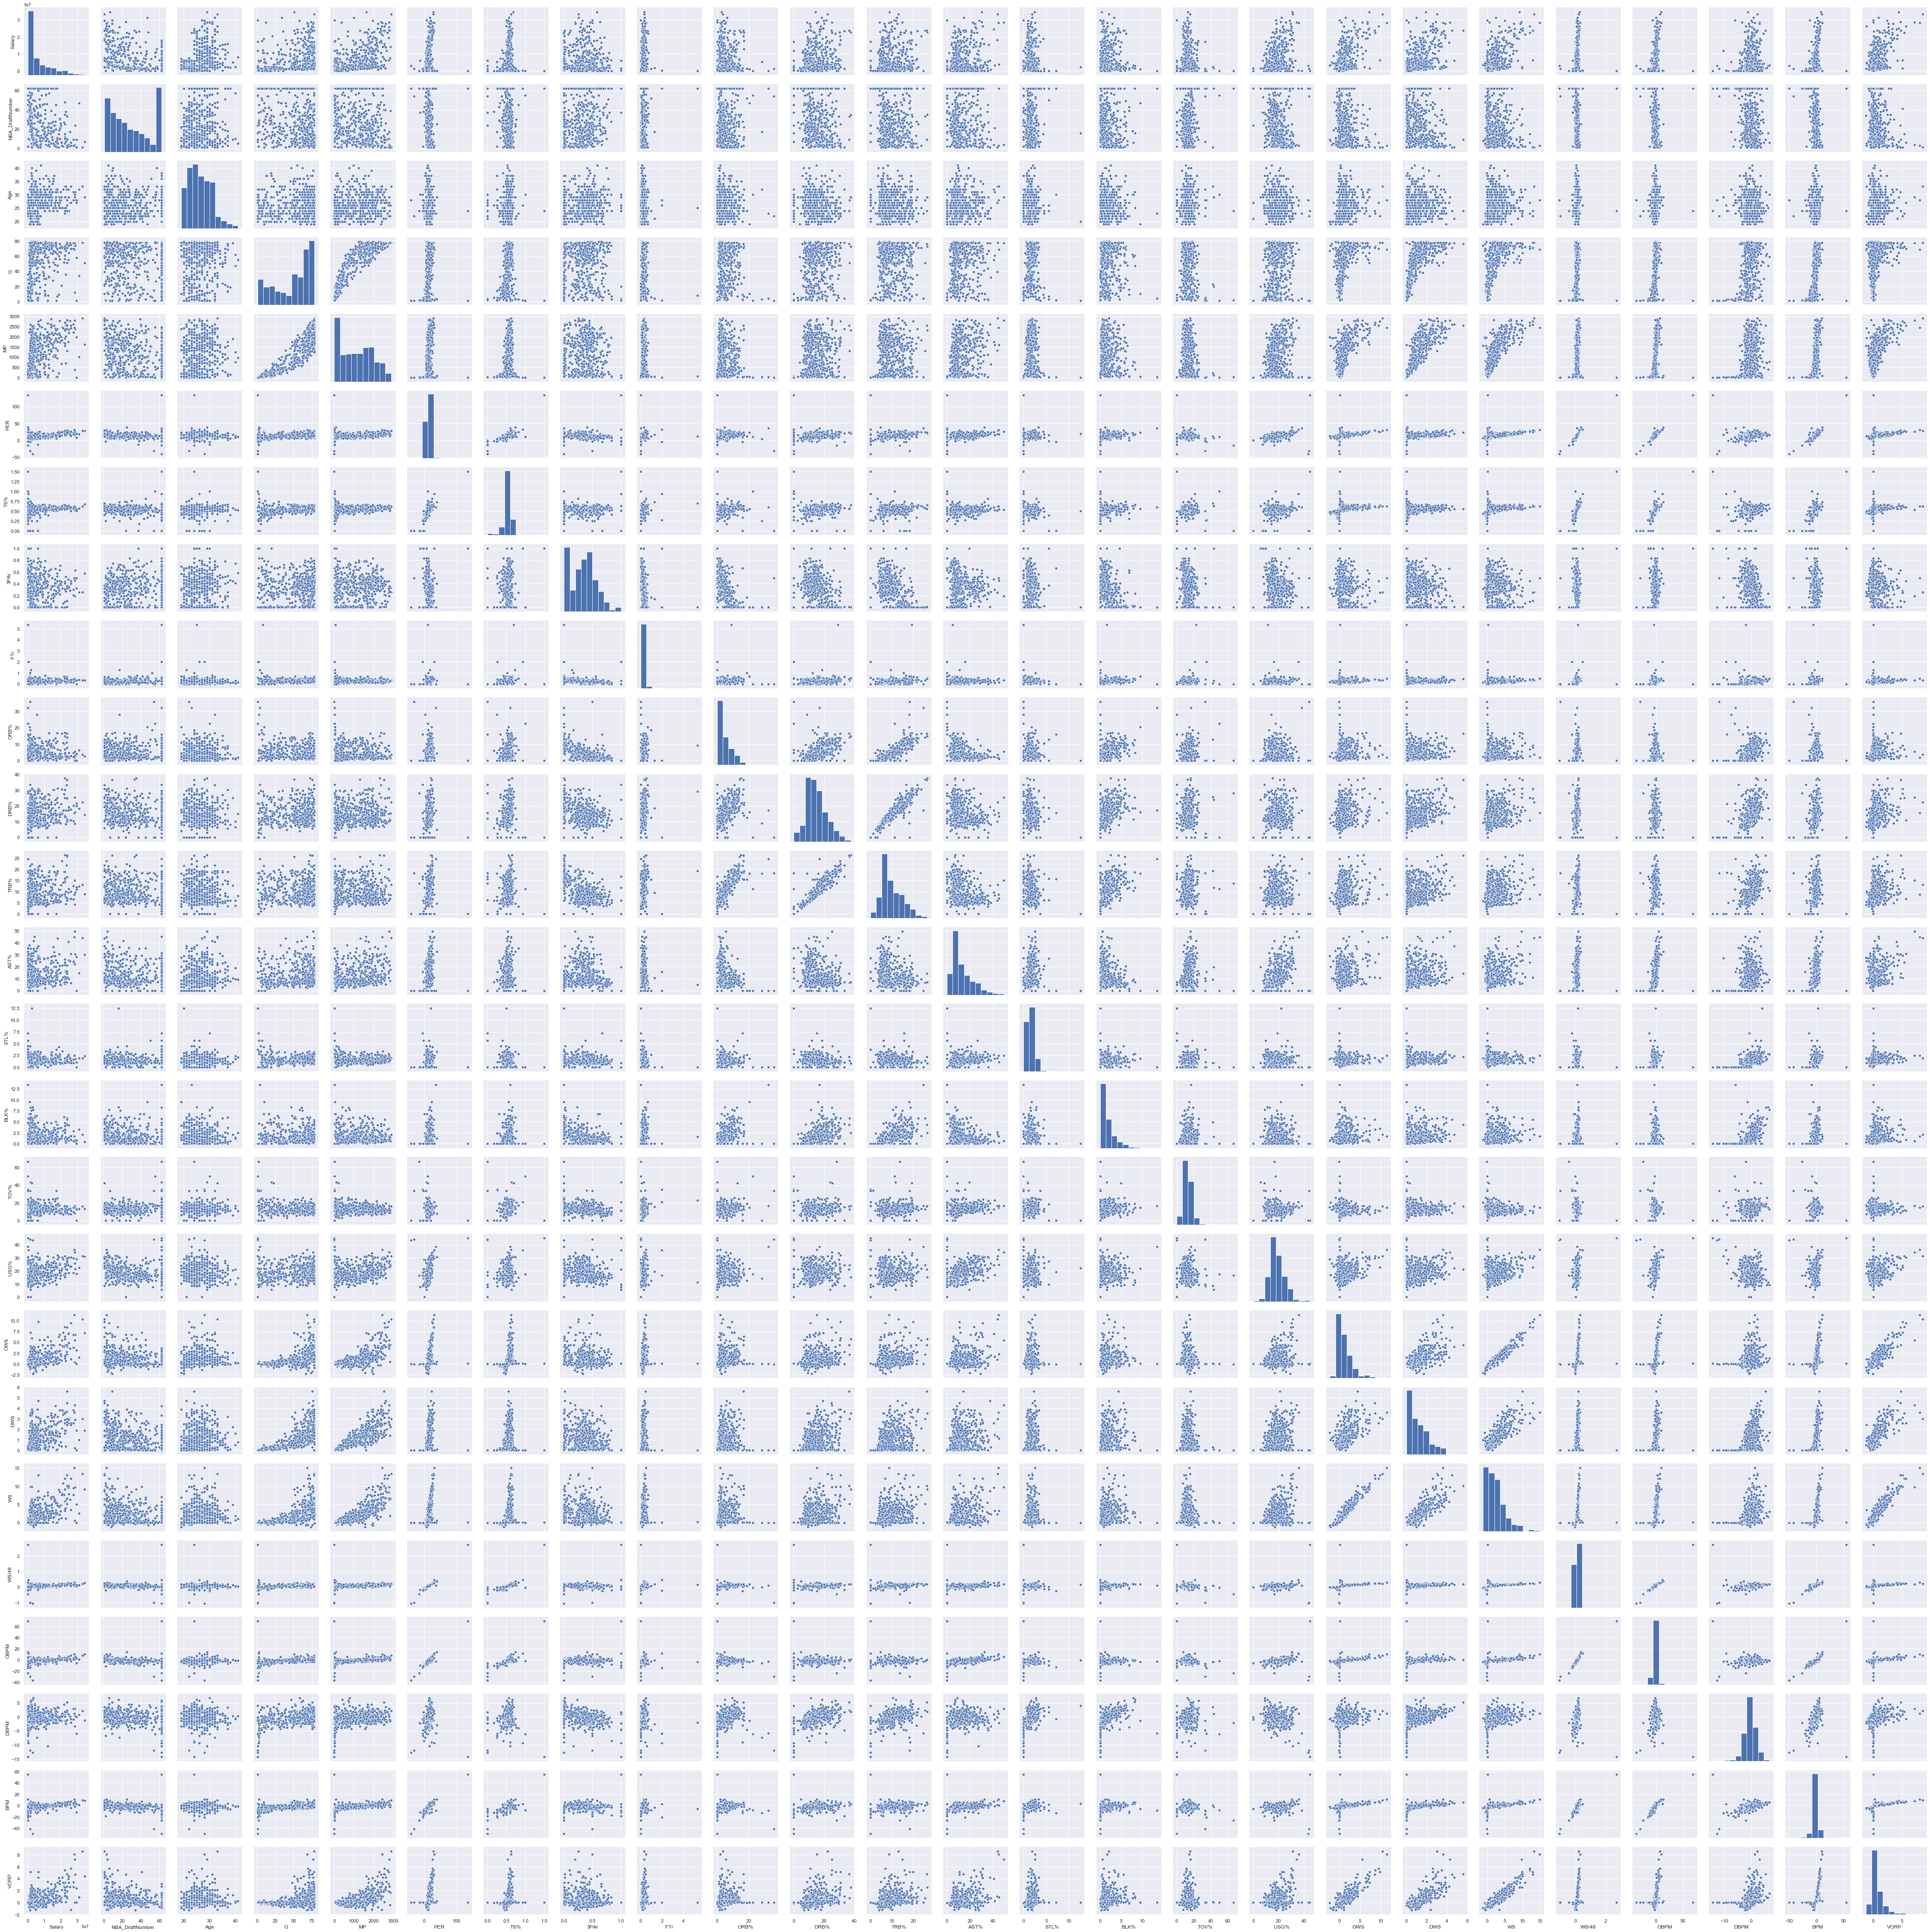

In [64]:
sns.pairplot(nba)

Feature engineering-used polynomial on the AGE feature



nba_copy = nba.copy()

nba_copy['Age2'] = nba['Age'] ** 2

In [67]:
nba_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 29 columns):
Player             485 non-null object
Salary             485 non-null int64
NBA_Country        485 non-null object
NBA_DraftNumber    485 non-null int64
Age                485 non-null int64
Tm                 485 non-null object
G                  485 non-null int64
MP                 485 non-null int64
PER                485 non-null float64
TS%                485 non-null float64
3PAr               485 non-null float64
FTr                485 non-null float64
ORB%               485 non-null float64
DRB%               485 non-null float64
TRB%               485 non-null float64
AST%               485 non-null float64
STL%               485 non-null float64
BLK%               485 non-null float64
TOV%               485 non-null float64
USG%               485 non-null float64
OWS                485 non-null float64
DWS                485 non-null float64
WS                 485 non-n

Created a new dataframe with the polynomial column

In [74]:
nba3_col=nba_copy[['NBA_DraftNumber','Age2','USG%','WS','VORP','Age']]

In [75]:
nba3_col

NBA_DraftNumber  Age2  USG%    WS  VORP  Age
0                 43   484  19.5  -0.2  -0.2   22
1                 42  1089  17.2   3.1   0.7   33
2                 19  1296  27.6   1.4   0.0   36
3                 13   484  29.5   0.4  -0.1   22
4                 10   400  15.5   0.8  -0.2   20
5                 62   576  17.0   3.1   0.6   24
6                 62   900  19.2   0.0   0.0   30
7                 62   529  21.7  -0.4  -0.3   23
8                 23   900  14.6   3.1   0.5   30
9                 35   529  21.7   1.4   0.3   23
10                62   729  16.6   1.6   0.1   27
11                 6   576  21.6   3.3   1.0   24
12                40   729  20.5   5.6   1.8   27
13                62   961  17.6   2.7   1.2   31
14                 4   900  13.0   1.7   0.8   30
15                33   529  11.8   0.5  -0.4   23
16                62   529  22.7   0.4  -0.3   23
17                28   900  17.3   4.1   0.9   30
18                17   441  19.6   0.1   0.0   21
19                62   529  38.5   0.0   0.0   23
20                 5  1681  14.7   1.0   0.2   41
21                 2   625  30.2   8.0   4.2   25
22                62   625   8.4  -0.1  -0.1   25
23                62  1369  11.2  -0.1  -0.1   37
24                24   441  12.7   3.4   0.9   21
25                 2  1225  10.6   2.6   0.5   35
26                 4   784  28.5   4.3   2.3   28
27                17   784  17.0   2.5   0.0   28
28                34   484  18.2  -0.4  -1.3   22
29                24   441   0.0   0.0   0.0   21
..               ...   ...   ...   ...   ...  ...
455               14   400  15.9   4.1   0.8   20
456               19   729  23.5  -0.1  -0.8   27
457               10   625  20.7   2.6   0.8   25
458               27  1024  12.4   0.1  -0.7   32
459               62   961  16.4   2.8   0.1   31
460               62   529  11.0   0.0   0.0   23
461               62  1024  14.7   4.8   1.3   32
462                1   576  29.8  13.0   4.7   24
463               23   441  18.1   0.8   0.1   21
464                1   484  23.6   1.9  -0.4   22
465               44   529  19.7   1.8  -0.1   23
466                1  1089   8.8   0.4   0.1   33
467               26   676   8.6   2.1   0.9   26
468                9  1156  11.5   3.3   1.0   34
469                9   576  21.2  10.1   4.8   24
470               56   900  12.7   3.6   1.3   30
471               31   625  18.6   2.2   0.3   25
472               62   625  15.5   0.1   0.0   25
473                8   729  14.9   4.2   1.6   27
474               62   576  11.9   0.2   0.0   24
475                5   576  16.6   4.3   0.9   24
476               32   576  12.7   2.2  -0.1   24
477               12   676  22.4   1.7  -0.3   26
478               62   625  17.5   0.0   0.0   25
479               15  1089  22.2   1.5   0.2   33
480                3   961  18.4   7.6   3.4   31
481               58   576  16.9   0.0  -0.3   24
482               62   529  14.4   0.1   0.0   23
483                4   484  24.5   3.0   1.0   22
484               26  1089  19.7   0.2  -0.1   33

[485 rows x 6 columns]

New linear regression for the dataframe

In [76]:
X = nba3_col

y = nba['Salary']

In [77]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.25, random_state=43)

In [78]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression train R^2: 0.530
Linear Regression val R^2: 0.517


An ok R^2 value

In [79]:
list(zip(X_train.columns, lm.coef_))

[('NBA_DraftNumber', -100404.82506341634),
 ('Age2', -56089.57054875419),
 ('USG%', 133239.19952480542),
 ('WS', 470821.57982456987),
 ('VORP', 1589082.3709103682),
 ('Age', 3630855.332249185)]

In [82]:
a=30

In [84]:
for a in range(19,40):
    print(a,3630855*a-56089*a**2)


19 48738116
20 50181500
21 51512706
22 52731734
23 53838584
24 54833256
25 55715750
26 56486066
27 57144204
28 57690164
29 58123946
30 58445550
31 58654976
32 58752224
33 58737294
34 58610186
35 58370900
36 58019436
37 57555794
38 56979974
39 56291976


In [86]:
nba_copy.head(2)

Player   Salary NBA_Country  NBA_DraftNumber  Age   Tm   G   MP  \
0        Zhou Qi   815615       China               43   22  HOU  16   87   
1  Zaza Pachulia  3477600     Georgia               42   33  GSW  66  937   

    PER    TS%  ...  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP  Age2  
0   0.6  0.303  ...  19.5 -0.4  0.1 -0.2 -0.121 -10.6   0.5 -10.1  -0.2   484  
1  16.8  0.608  ...  17.2  1.7  1.4  3.1  0.160  -0.6   1.3   0.8   0.7  1089  

[2 rows x 29 columns]

In [87]:
nba3_col.head()

NBA_DraftNumber  Age2  USG%   WS  VORP  Age
0               43   484  19.5 -0.2  -0.2   22
1               42  1089  17.2  3.1   0.7   33
2               19  1296  27.6  1.4   0.0   36
3               13   484  29.5  0.4  -0.1   22
4               10   400  15.5  0.8  -0.2   20

In [93]:
lm.coef_

array([-100404.82506342,  -56089.57054875,  133239.19952481,
        470821.57982457, 1589082.37091037, 3630855.33224919])

In [95]:
nba3_col.iloc[0]

NBA_DraftNumber     43.0
Age2               484.0
USG%                19.5
WS                  -0.2
VORP                -0.2
Age                 22.0
Name: 0, dtype: float64

In [96]:
np.array(nba3_col.iloc[0])

array([ 4.30e+01,  4.84e+02,  1.95e+01, -2.00e-01, -2.00e-01,  2.20e+01])

Lm. predict

In [97]:
lm.predict(np.array(nba3_col.iloc[0]))

ValueError: Expected 2D array, got 1D array instead:
array=[ 4.30e+01  4.84e+02  1.95e+01 -2.00e-01 -2.00e-01  2.20e+01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [100]:
y_predict=lm.predict(nba3_col)

In [99]:
nba.head(2)

Player   Salary NBA_Country  NBA_DraftNumber  Age   Tm   G   MP  \
0        Zhou Qi   815615       China               43   22  HOU  16   87   
1  Zaza Pachulia  3477600     Georgia               42   33  GSW  66  937   

    PER    TS%  ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP  
0   0.6  0.303  ...  18.2  19.5 -0.4  0.1 -0.2 -0.121 -10.6   0.5 -10.1  -0.2  
1  16.8  0.608  ...  19.3  17.2  1.7  1.4  3.1  0.160  -0.6   1.3   0.8   0.7  

[2 rows x 28 columns]

In [102]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(nba['Salary'], y_predict))


5066705.557351576

Excluding 95% and 5% data- information pulled from other notebook. 

In [103]:
nba4=nba[(nba.Salary <= 23089603.0) & (nba.Salary >= 92160.0)]

In [104]:
nba4['Age2'] = nba4['Age'] ** 2

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
nba4.head(4)

Player    Salary NBA_Country  NBA_DraftNumber  Age   Tm   G    MP  \
0        Zhou Qi    815615       China               43   22  HOU  16    87   
1  Zaza Pachulia   3477600     Georgia               42   33  GSW  66   937   
2  Zach Randolph  12307692         USA               19   36  SAC  59  1508   
3    Zach LaVine   3202217         USA               13   22  CHI  24   656   

    PER    TS%  ...  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP  Age2  
0   0.6  0.303  ...  19.5 -0.4  0.1 -0.2 -0.121 -10.6   0.5 -10.1  -0.2   484  
1  16.8  0.608  ...  17.2  1.7  1.4  3.1  0.160  -0.6   1.3   0.8   0.7  1089  
2  17.3  0.529  ...  27.6  0.3  1.1  1.4  0.046  -0.6  -1.3  -1.9   0.0  1296  
3  14.6  0.499  ...  29.5 -0.1  0.5  0.4  0.027  -0.7  -2.0  -2.6  -0.1   484  

[4 rows x 29 columns]

Train, validation, test for the 95% and 5%

In [109]:
nba4_col=nba4[['NBA_DraftNumber','Age2','USG%','WS','VORP','Age']]

In [115]:
X = nba4_col

y = nba4['Salary']

In [116]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.25, random_state=43)

In [117]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression train R^2: 0.465
Linear Regression val R^2: 0.267


In [114]:
nba4_col.describe()

NBA_DraftNumber         Age2        USG%          WS        VORP  \
count       439.000000   439.000000  439.000000  439.000000  439.000000   
mean         29.218679   704.339408   18.541230    2.287927    0.487016   
std          20.474899   243.978433    5.602797    2.303742    0.977271   
min           1.000000   361.000000    0.000000   -1.200000   -1.300000   
25%          11.000000   529.000000   14.900000    0.400000   -0.100000   
50%          24.000000   625.000000   17.600000    1.900000    0.100000   
75%          45.500000   841.000000   21.800000    3.400000    0.900000   
max          62.000000  1681.000000   45.100000   13.000000    5.400000   

              Age  
count  439.000000  
mean    26.175399  
std      4.385399  
min     19.000000  
25%     23.000000  
50%     25.000000  
75%     29.000000  
max     41.000000

In [119]:
nba5=nba[(nba.Salary >= 815615)]

In [120]:
nba5['Age2'] = nba5['Age'] ** 2

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
nba5_col=nba5[['NBA_DraftNumber','Age2','USG%','WS','VORP','Age']]
X = nba5_col

y = nba5['Salary']

In [123]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.25, random_state=43)

In [124]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression train R^2: 0.522
Linear Regression val R^2: 0.506


removed bottom 10 percent and top 5 percent

In [125]:
nba6=nba[(nba.Salary <= 23089603.0) & (nba.Salary >= 815615)]

In [126]:
nba6['Age2'] = nba6['Age'] ** 2

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
nba6_col=nba6[['NBA_DraftNumber','Age2','USG%','WS','VORP','Age']]
X = nba6_col

y = nba6['Salary']

In [128]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.25, random_state=43)

In [129]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression train R^2: 0.425
Linear Regression val R^2: 0.362


In [130]:
nba7=nba[(nba.Salary <= 28833175) & (nba.Salary >= 815615)]

In [131]:
nba7_col=nba7[['NBA_DraftNumber','USG%','WS','VORP','Age']]
X = nba7_col

y = nba7['Salary']

In [132]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.25, random_state=43)

In [133]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression train R^2: 0.465
Linear Regression val R^2: 0.496


In [143]:
nba8=nba[(nba.Salary <= 28833175) & (nba.Salary >= 815615)]

In [135]:
nba8['Age2'] = nba8['Age'] ** 2

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
X = nba8_col

y = nba8['Salary']

In [145]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.25, random_state=43)

In [146]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression train R^2: 0.505
Linear Regression val R^2: 0.557


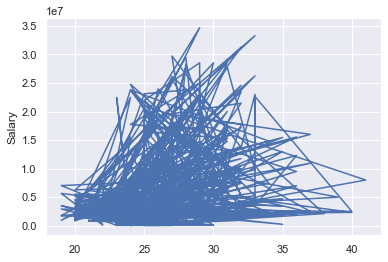

In [147]:
import matplotlib.pyplot as plt
plot(nba['Age'],nba['Salary']) 
plt.ylabel('Salary')
plt.show()

In [151]:
nba_sorted=nba.sort_values(['Age'])

In [153]:
nba_sorted.head(100)

Player    Salary       NBA_Country  NBA_DraftNumber  \
318             Ike Anigbogu    950000               USA               47   
279             Jayson Tatum   5645400               USA                3   
60         Terrance Ferguson   1785000               USA               21   
180               Malik Monk   2904480               USA               11   
170           Markelle Fultz   7026240               USA                1   
287            Jarrett Allen   1713720               USA               22   
341          Frank Ntilikina   3501120            France                8   
299             Jamal Murray   3355320            Canada                7   
339           Furkan Korkmaz   1465920            Turkey               26   
333     Georgios Papagiannis   2301360            Greece               13   
363            Dragan Bender   4468800           Croatia                4   
310              Ivica Zubac   1312611           Croatia               32   
54                Thon Maker   2684160       South Sudan               10   
55             Thomas Bryant    815615               USA               42   
259             John Collins   1936920               USA               19   
252           Jonathan Isaac   4186320               USA                6   
378            Derrick Jones   1312611               USA               62   
381             Dennis Smith   3218280               USA                9   
46              Tony Bradley   1414920               USA               28   
311                Ivan Rabb    950000               USA               35   
242             Josh Jackson   5090040               USA                4   
392             De'Aaron Fox   4609200               USA                5   
66                 T.J. Leaf   2028360               USA               18   
127               OG Anunoby   1645200  United Kingdo...               23   
455              Bam Adebayo   2490360               USA               14   
194          Lauri Markkanen   3821640           Finland                7   
192               Lonzo Ball   6286560               USA                2   
4               Zach Collins   3057240               USA               10   
168          Marquese Chriss   3073800               USA                8   
231            Justin Patton   2247480               USA               16   
..                       ...       ...               ...              ...   
184       Malachi Richardson   1504560               USA               22   
402               Dante Exum   4992385         Australia                5   
224               Kay Felder   1312611               USA               54   
324       Guerschon Yabusele   2247480            France               16   
306            Jabari Parker   6782392               USA                2   
118            Patrick McCaw   1312611               USA               38   
301             Jakob Poeltl   2825640           Austria                9   
361             Dwayne Bacon    815615               USA               40   
280            Jaylen Morris     92160               USA               62   
370            Dillon Brooks    815615            Canada               45   
222              Kelly Oubre   2093040               USA               15   
244                Josh Hart   1394520               USA               30   
237         Juan Hernangomez   2076840             Spain               15   
232           Justin Jackson   2365560               USA               15   
393               Davon Reed    815615               USA               32   
228       Karl-Anthony Towns   6216840               USA                1   
313         Isaiah Whitehead   1312611               USA               42   
226               Kay Felder   1312611               USA               54   
225               Kay Felder   1312611               USA               54   
483             Aaron Gordon   5504420               USA                4   
303            Jah

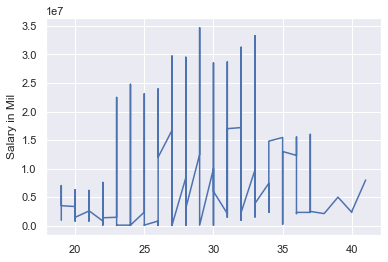

In [158]:
plot(nba_sorted['Age'],nba_sorted['Salary']) 
plt.ylabel('Salary in Mil')
plt.show()

In [155]:
nba_sorted_draft=nba.sort_values(['NBA_DraftNumber'])

In [180]:
%config InlineBackend.figure_format='jpeg'

Graph to look at the Draft Number for project

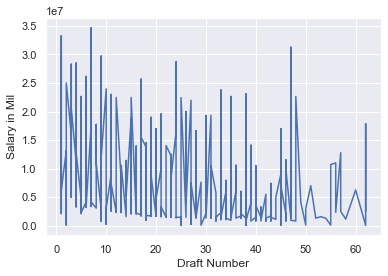

<Figure size 432x288 with 0 Axes>

In [181]:

plot(nba_sorted_draft['NBA_DraftNumber'],nba_sorted_draft['Salary']) 
plt.ylabel('Salary in Mil')
plt.xlabel('Draft Number')
plt.show()
plt.savefig('Figure Salary vs Draft Number',format='jpeg',dpi=500)

In [169]:
%config InlineBackend.figure_format='svg'
plt.savefig('Salary vs Draft Number',format='svg',dpi=500)

<Figure size 432x288 with 0 Axes>